In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

from __future__ import division
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']

import numpy as np
import healpy as hp
import scipy
from scipy import special as ss
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from skimage.feature import peak_local_max
from skimage import data, img_as_float
import math,glob
import NX01_bayesutils as bu
import NX01_utils as utils

# IPTA MDC injection

## Injected map

In [2]:
clm_inj = np.load('nanogravTests_pointAnis.npy')

In [3]:
clm_inj

array([ 3.5449077 , -0.58004952,  0.5000429 ,  0.38757574, -0.58507975,
       -0.75636711,  0.00869584,  0.50537718, -0.24235522, -0.10852881,
       -0.90302081, -0.38019683, -0.49805607,  0.25403584, -0.37405437,
       -0.54562877,  0.33893872, -0.18974301, -0.69957401,  0.28682588,
       -0.58943123, -0.19167782, -0.28981041, -0.95390645, -0.33894172])

/Users/staylor/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


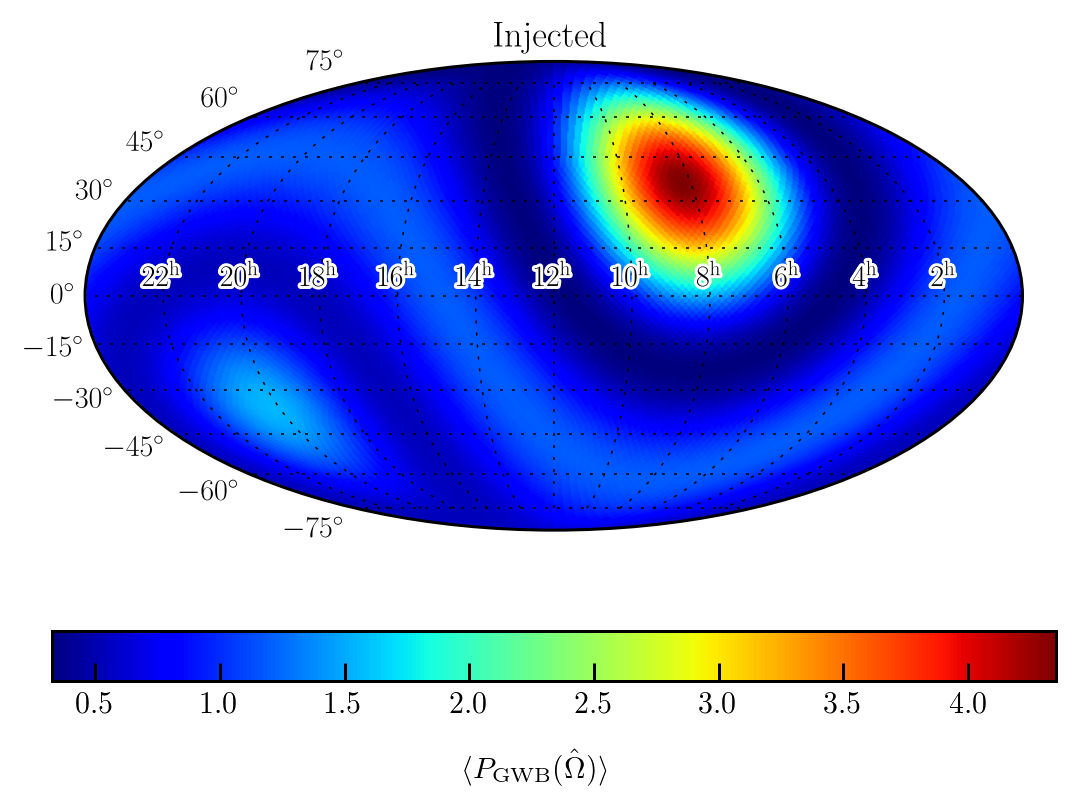

In [4]:
map_inj = bu.makeSkyMap(clm_inj[1:],lmax=4,nside=32)
plt.title('Injected')
#plt.savefig('nanoAnisTests_pointInj.png',bbox_inches='tight',dpi=400)

## Spherical harmonic analysis: produce posterior averaged skymap

In [8]:
#clm_chain = np.loadtxt('chains_mdc1_anisSim_hotspot/nanograv_gwbdetect_Lmax4_gamVary_reddetectpowerlaw_nmodes15/chain_1.0.txt')
clm_chain = np.loadtxt('chains_iptamdc_mockanishotspot/pta_gwbloguniform_Lmax4_gamVary_redFix_nmodes20/chain_1.txt')

In [9]:
print clm_chain.shape
print clm_chain[:,-3-(4+1)**2:-4].shape

(12500, 30)
(12500, 24)


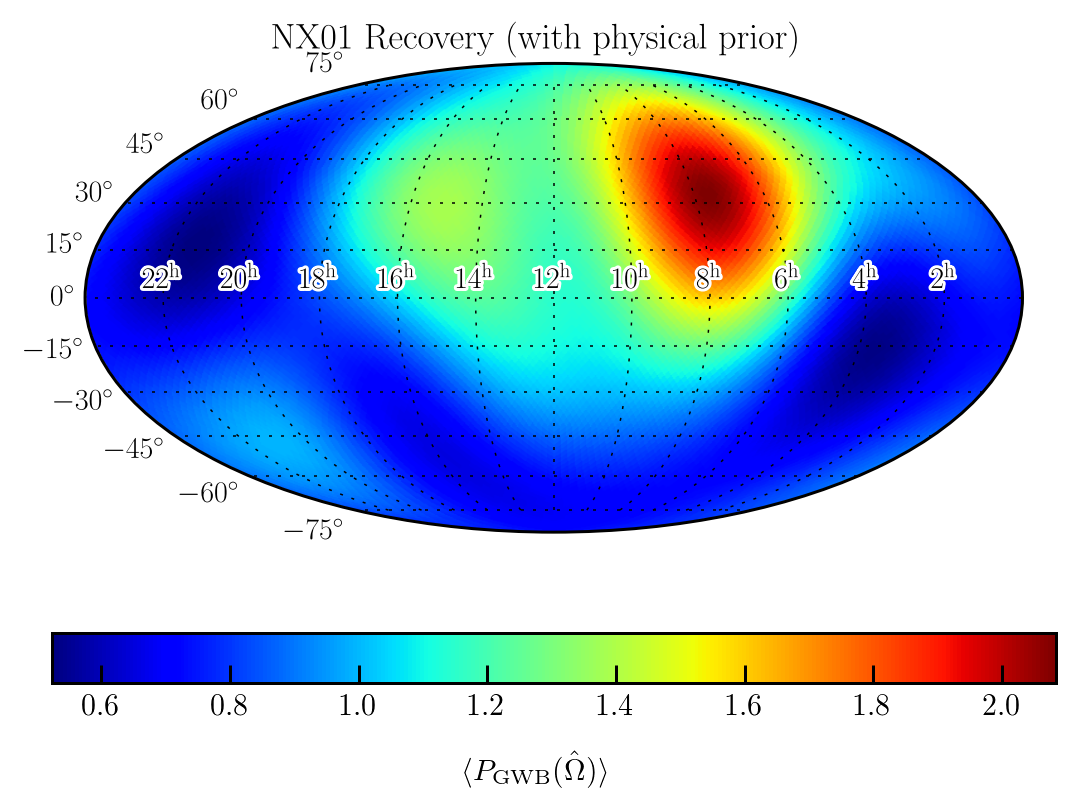

In [10]:
map_expected = bu.makeSkyMap(clm_chain[:,-3-(4+1)**2:-4],lmax=4,nside=32)
plt.title('NX01 Recovery (with physical prior)')
#plt.savefig('iptamdc_hotspotrecovery.pdf',bbox_inches='tight',dpi=400)

## Point-source anisotropy: produce posterior averaged skymap

In [5]:
pointSrc_chain = np.loadtxt('chains_mdc1_anisSim_hotspot/nanograv_gwbdetect_pointSrc_gamVary_reddetectpowerlaw_nmodes15/chain_1.0.txt')

Sigma is 68.754935 arcmin (0.020000 rad) 
-> fwhm is 161.905500 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


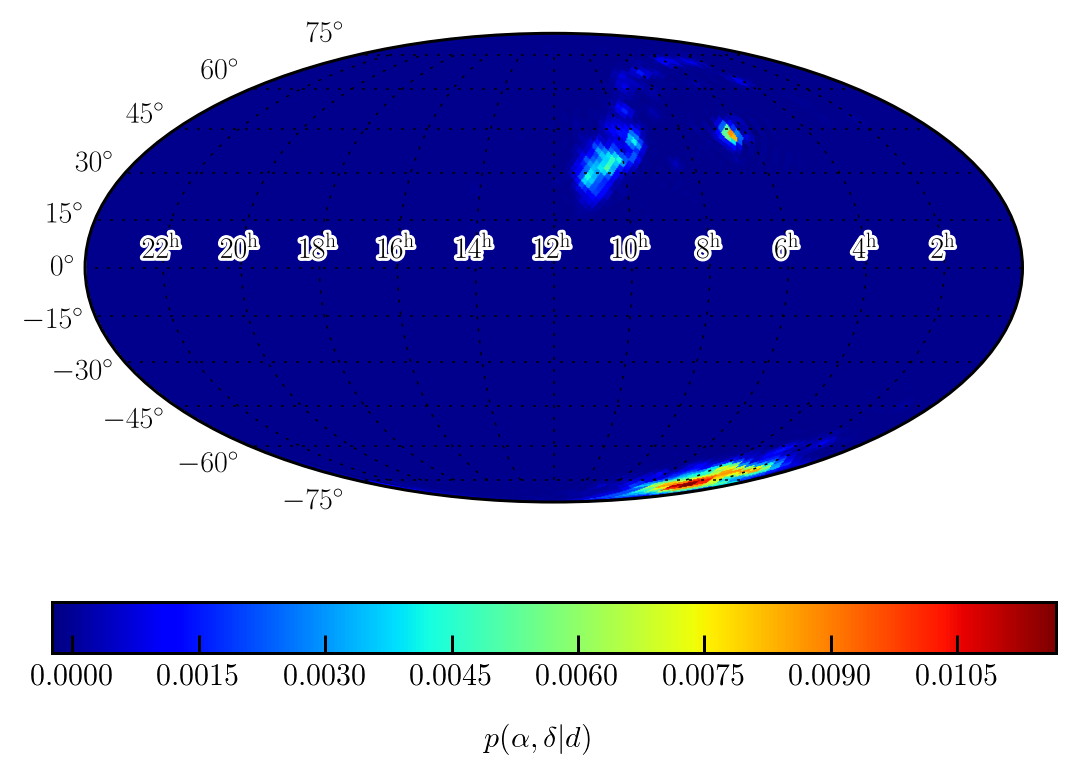

In [11]:
#map_point = bu.plotSkyMap(pointSrc_chain[:,74], np.pi/2. - np.arccos(pointSrc_chain[:,75]), nside=64, cmap='jet', outfile='skymap.pdf')
map_point = bu.plotSkyMap(pointSrc_chain[:,74] + np.pi, np.pi/2. - (np.pi - np.arccos(pointSrc_chain[:,75])), nside=32, cmap='jet', outfile='skymap.pdf')

# NANOGrav-type data with hotspot

In [11]:
clm_chain = np.loadtxt('nemo_nano9yr_anis/chains_nano9yr_anisSim_hotspot/nanograv_gwbdetect_Lmax4_gamVary_reddetectpowerlaw_nmodes15/chain_1.0.txt')

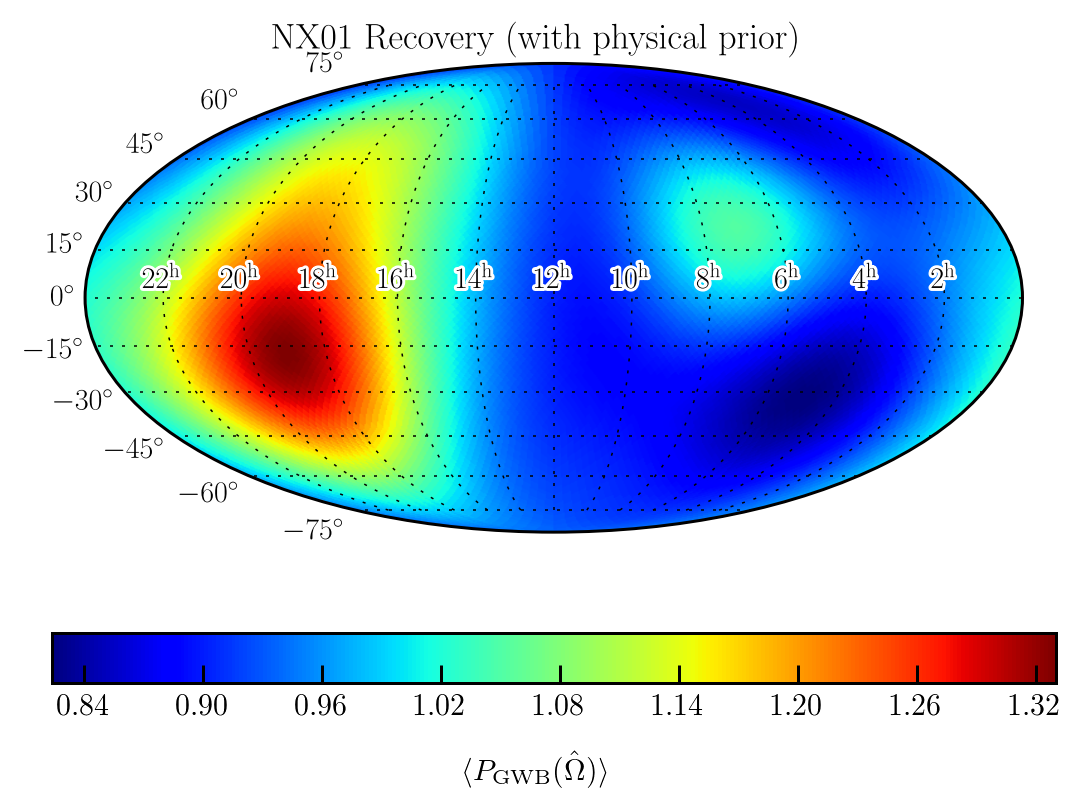

In [13]:
map_expected = bu.makeSkyMap(clm_chain[:,-3-(4+1)**2:-4],lmax=4,nside=32)
plt.title('NX01 Recovery (with physical prior)')
#plt.savefig('nanoAnisTests_pointRecvr.png',bbox_inches='tight',dpi=400)

In [14]:
clm_chain.shape

(226100, 66)

In [63]:
import corner

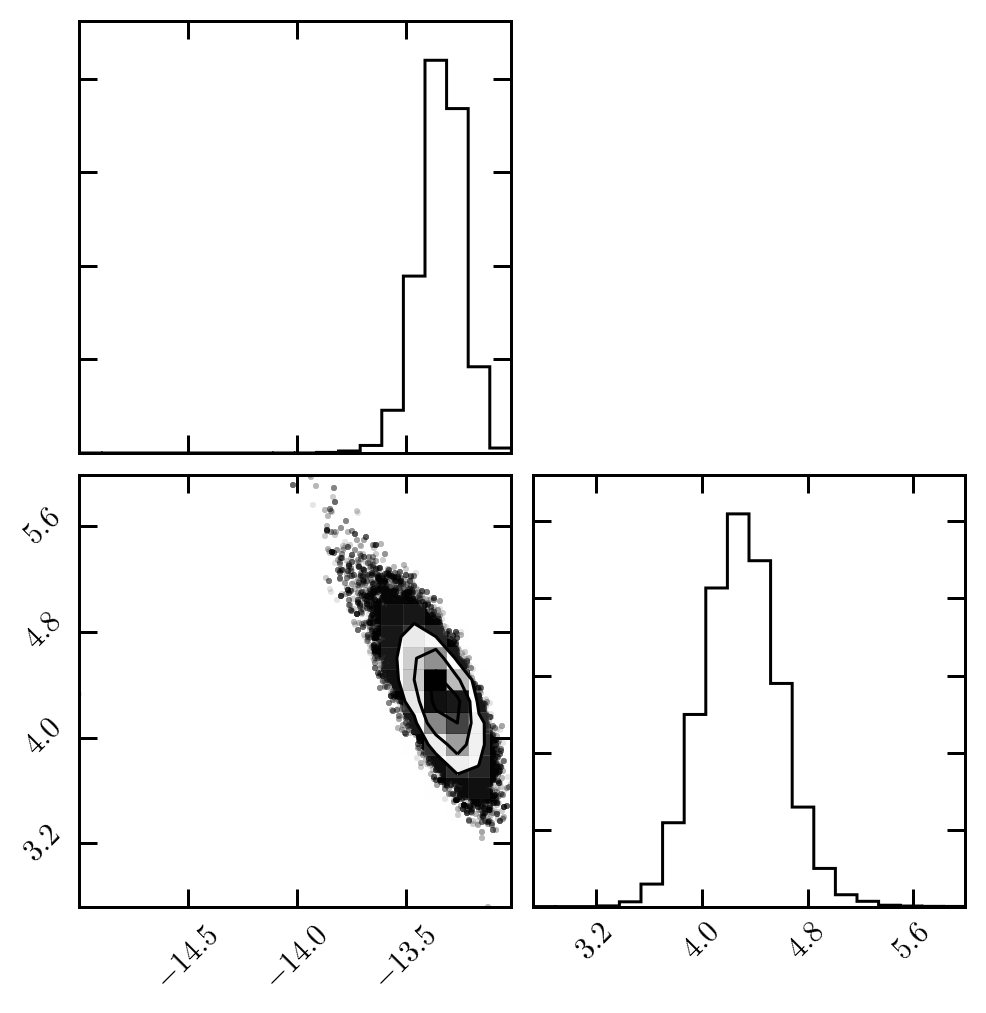

In [16]:
figure = corner.corner(clm_chain[:,[36,37]])

## Now we're going to plot the results of the 10 IPTA MDC injections

In [19]:
dirs = sorted(glob.glob('chains_mdc1_anisSim_hotspot-dataset*'))
dirs = dirs + sorted(glob.glob('chains_mdc1_anisSim_hotspot_dataset*'))

In [21]:
dirs

['chains_mdc1_anisSim_hotspot-dataset0',
 'chains_mdc1_anisSim_hotspot-dataset1',
 'chains_mdc1_anisSim_hotspot_dataset2',
 'chains_mdc1_anisSim_hotspot_dataset3',
 'chains_mdc1_anisSim_hotspot_dataset4',
 'chains_mdc1_anisSim_hotspot_dataset5',
 'chains_mdc1_anisSim_hotspot_dataset6',
 'chains_mdc1_anisSim_hotspot_dataset7',
 'chains_mdc1_anisSim_hotspot_dataset8',
 'chains_mdc1_anisSim_hotspot_dataset9']

In [22]:
chains = []
for real in dirs:
    chains.append(np.loadtxt(real+'/pta_gwbloguniform_Lmax4_gamVary_redloguniformpowerlaw_nmodes15/chain_1.0.txt'))
    print 'ok'

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


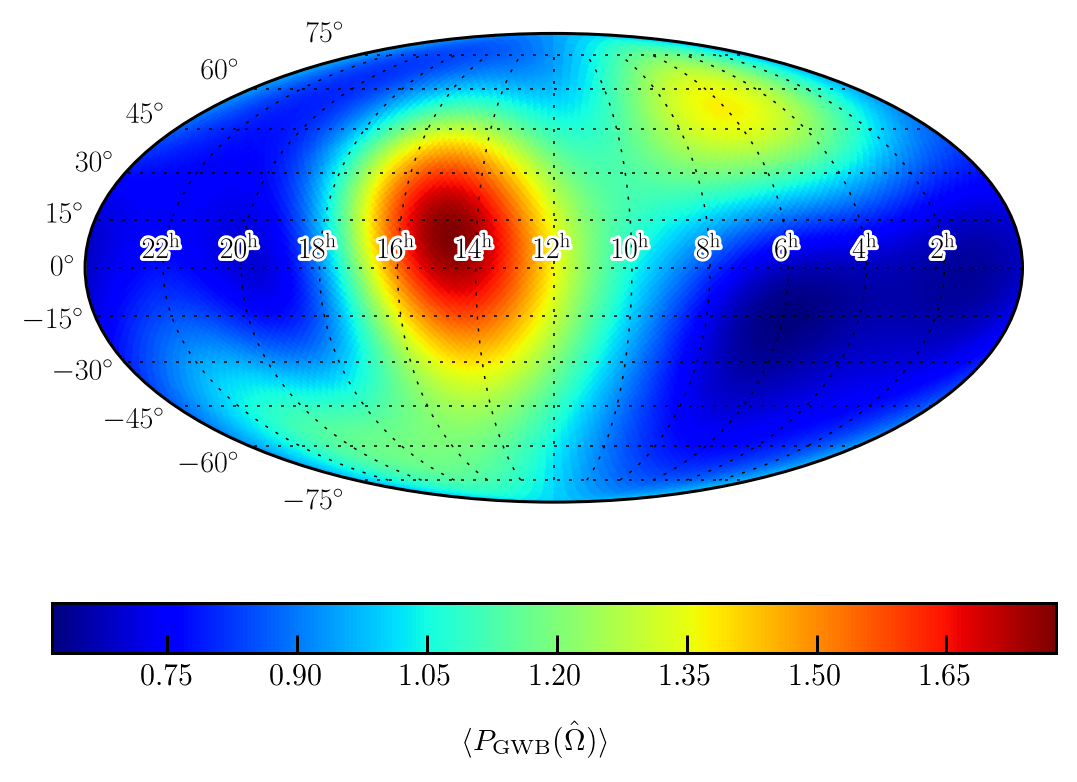

In [58]:
postAv = bu.makeSkyMap(chains[2][:,-3-(4+1)**2:-4],lmax=4,nside=32)
#plt.title('NX01 Recovery (with physical prior)')

In [54]:
ind = 9
map_value = chains[ind][np.argmax(chains[ind][:,-4]),-3-(4+1)**2:-4]

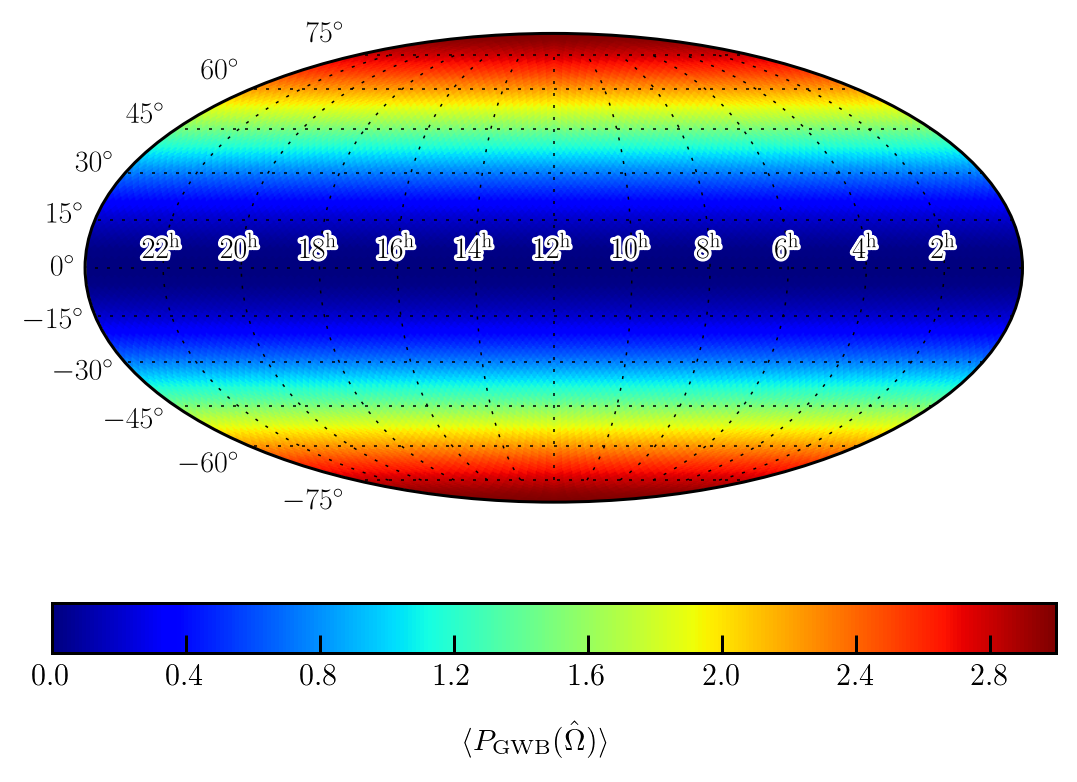

In [61]:
maxpost_map = bu.makeSkyMap(np.array([0.,0.,0.,0.,0.,4.*np.sqrt(np.pi/5.),0.,0.]),lmax=2,nside=32)

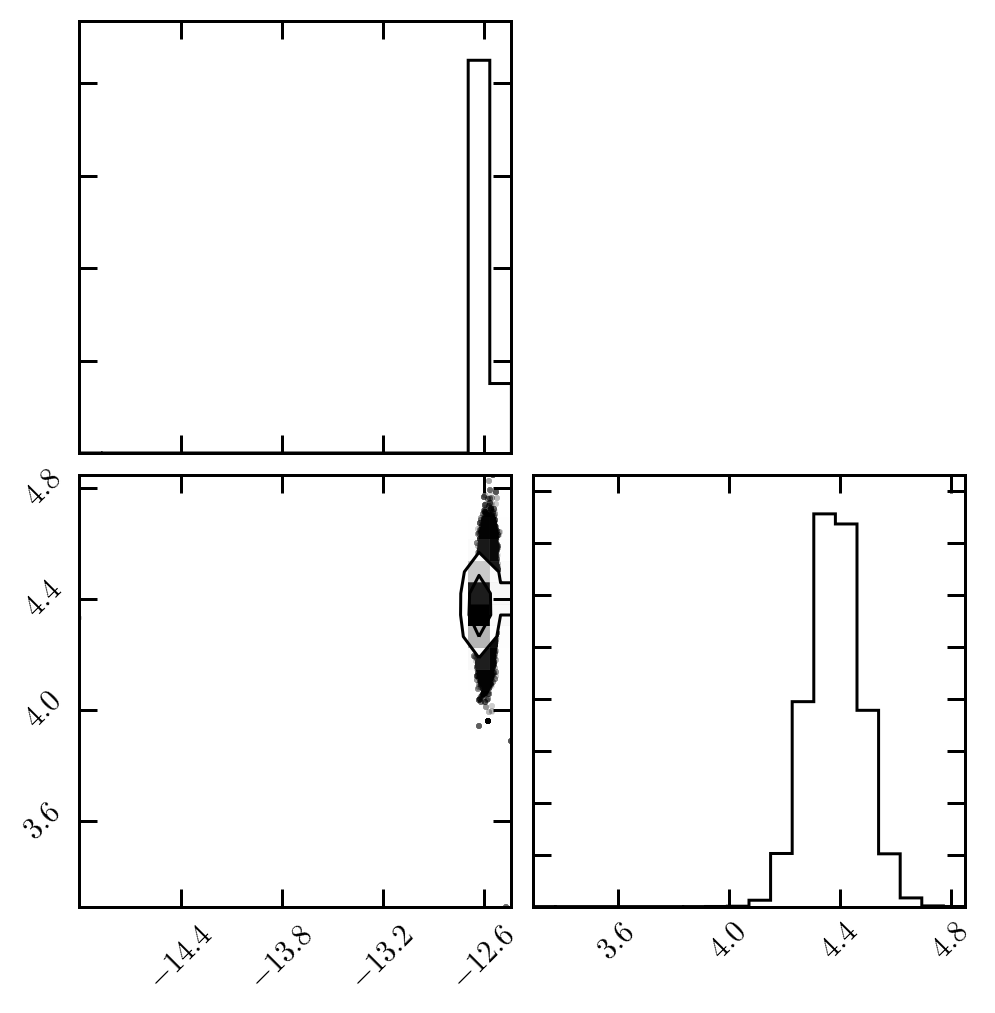

In [77]:
figure = corner.corner(chains[3][:,[36,37]])